# 高斯滤波

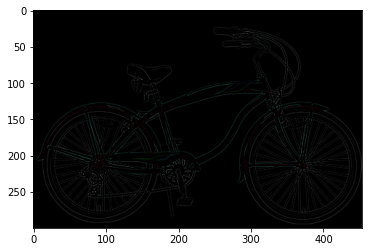

In [291]:
import cv2
import datetime
import matplotlib.pyplot as plt 
import numpy as np
import PIL

im = plt.imread('./data/bicycle.bmp')
image_3_LF = cv2.GaussianBlur(im,(3,3),0)  #(3,3)为高斯半径
#image_3_LF为高斯滤波后的低分图像
res_3 = cv2.subtract(im , image_3_LF )  #得到残差高频图
# plt.imsave('./img_1_res.bmp', res_3)

plt.imshow(res_3)
plt.show()

# 拉普拉斯滤波

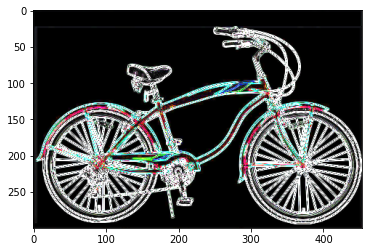

In [292]:
import cv2
import numpy as np
 
img = plt.imread("./data/bicycle.bmp", 0)

grey_lap = cv2.Laplacian(img, cv2.CV_16S, ksize = 3)
dst = cv2.convertScaleAbs(grey_lap)
 
plt.imshow(dst)
plt.show()

# 高斯+拉普拉斯

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


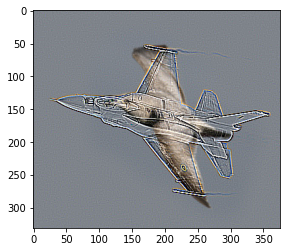

In [293]:
import cv2
import datetime
import matplotlib.pyplot as plt 
import numpy as np
import PIL

img = plt.imread('./data/bird.bmp')
# 高斯低通滤波
gaussian = cv2.GaussianBlur(img,(3,3),0)  #(3,3)为高斯半径
gaussian = cv2.subtract(img, gaussian)  #得到残差高频图

img = plt.imread("./data/plane.bmp")
# 拉普拉斯变换
grey_lap = cv2.Laplacian(img, cv2.CV_16S, ksize = 3)
dst = cv2.convertScaleAbs(grey_lap)

# 图像叠加
plt.imshow(gaussian + grey_lap)
plt.show()

# 高斯 高低 滤波 （opencv版本）

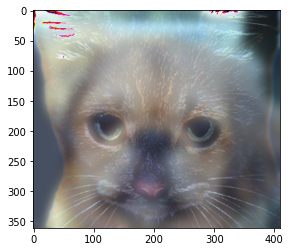

In [294]:
import cv2
import datetime
import matplotlib.pyplot as plt 
import numpy as np
import PIL

img = plt.imread('./data/cat.bmp')
# 高斯高通滤波
gaussain1 = cv2.GaussianBlur(img,(55,55),0,0)  #(3,3)为高斯半径
gaussain1 = cv2.subtract(img , gaussain1 )  #得到残差高频图

img = plt.imread("./data/dog.bmp")
# 高斯高通滤波
gaussain2 = cv2.GaussianBlur(img,(45,45),0,0)  #(3,3)为高斯半径

# 图像叠加
plt.imshow(gaussain1 + gaussain2)
plt.show()

# 高斯 高低 滤波 （手写版本）

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


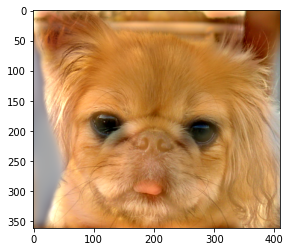

In [67]:
import numpy as np
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import math
import torch
import matplotlib.pyplot as plt 

# generate a gussian matrix
def makeGaussianFilter(numRows, numCols, sigma, highPass=True):
    centerI = int(numRows/2) + 1 if numRows % 2 == 1 else int(numRows/2)
    centerJ = int(numCols/2) + 1 if numCols % 2 == 1 else int(numCols/2)
    
    # 2-dimension gaussian formula
    def gaussian(i,j):
        coefficient = math.exp(-1.0 * ((i - centerI)**2 + (j - centerJ)**2) / (2 * math.pi * sigma**2))
        return 1 - coefficient if highPass else coefficient

    return np.array([[gaussian(i,j) for j in range(numCols)] for i in range(numRows)])


def filterDFT(imageMatrix, filterMatrix):
    shiftedDFT = fftshift(fft2(imageMatrix))
    filteredDFT = shiftedDFT * filterMatrix
    return ifft2(ifftshift(filteredDFT))


def lowPass(imageMatrix, sigma):
    n,m = imageMatrix.shape
    return filterDFT(imageMatrix, makeGaussianFilter(n, m, sigma, highPass=False))


def highPass(imageMatrix, sigma):
    n,m = imageMatrix.shape
    return filterDFT(imageMatrix, makeGaussianFilter(n, m, sigma, highPass=True))


def hybridImage(highFreqImg, lowFreqImg, sigmaHigh, sigmaLow):
    dim,_,_ = highFreqImg.shape
    image_3d = []
    # 遍历每一维 RGB
    for i in range(dim):
        highPassed = highPass(highFreqImg[i], sigmaHigh)
        lowPassed = lowPass(lowFreqImg[i], sigmaLow)
        # 高通 + 低通 混合
        image_3d.append(highPassed + lowPassed)
    
    return np.array(image_3d)


if __name__ == "__main__":
    img1 = plt.imread("./data/dog.bmp") / 255.0
    img2 = plt.imread("./data/cat.bmp") / 255.0
    # 维度数据转换
    img1 = np.array(torch.tensor(img1).permute(2,0,1))
    img2 = np.array(torch.tensor(img2).permute(2,0,1))
    # 图像混合
    hybrid = hybridImage(img1, img2, 3, 5)
    hybrid = np.array(torch.tensor(np.real(hybrid)).permute(1,2,0))
    # 图像显示
    plt.imshow(hybrid)
    plt.show()